# [作業目標]
- 使用 Day 12 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 12 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
app_train['YEARS_BIRTH'] = app_train['DAYS_BIRTH']/365

In [8]:
app_train['YEARS_BIRTH'].head()

0    25.920548
1    45.931507
2    52.180822
3    52.068493
4    54.608219
Name: YEARS_BIRTH, dtype: float64

In [11]:
app_train['YEARS_BIRTH_GRP'] = pd.cut(app_train['YEARS_BIRTH'], 5 )

In [12]:
app_train['YEARS_BIRTH_GRP'].value_counts()

(30.238, 39.959]    80188
(39.959, 49.679]    74661
(49.679, 59.4]      66194
(20.469, 30.238]    46806
(59.4, 69.121]      39662
Name: YEARS_BIRTH_GRP, dtype: int64

In [18]:
app_train['YEARS_BIRTH'].corr(app_train['TARGET'])

-0.07823930830982713

In [20]:
age_data = app_train[['YEARS_BIRTH', 'TARGET']]

In [22]:
age_data.head()

,YEARS_BIRTH,TARGET
0,25.920548,1
1,45.931507,0
2,52.180822,0
3,52.068493,0
4,54.608219,0


In [25]:
age_data['age_group'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
age_data.head()

,YEARS_BIRTH,TARGET,age_group
0,25.920548,1,"(25.0, 30.0]"
1,45.931507,0,"(45.0, 50.0]"
2,52.180822,0,"(50.0, 55.0]"
3,52.068493,0,"(50.0, 55.0]"
4,54.608219,0,"(50.0, 55.0]"


In [27]:
age_grp = age_data.groupby(age_data['age_group']).mean()

In [28]:
age_grp

,YEARS_BIRTH,TARGET
age_group,,
"(20.0, 25.0]",23.377522,0.123036
"(25.0, 30.0]",27.822518,0.111436
"(30.0, 35.0]",32.479037,0.102814
"(35.0, 40.0]",37.555913,0.089414
"(40.0, 45.0]",42.459346,0.078491
"(45.0, 50.0]",47.462741,0.074171
"(50.0, 55.0]",52.593136,0.066968
"(55.0, 60.0]",57.491131,0.055314
"(60.0, 65.0]",62.412459,0.052737


<Figure size 360x360 with 0 Axes>

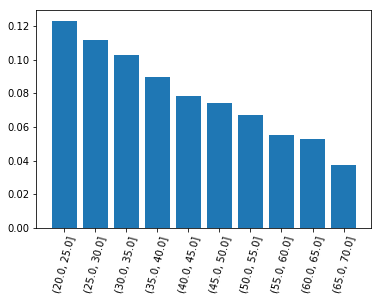

<Figure size 360x360 with 0 Axes>

In [44]:
# plt.hist(age_grp['YEARS_BIRTH'], age_grp['TARGET'])
plt.bar(range(len(age_grp.index)), age_grp['TARGET'])
plt.xticks(range(len(age_grp.index)), age_grp.index, rotation = 75);
plt.figure(figsize=( 5, 5))

In [34]:
len(age_grp.index)

10